In [44]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:
# Reading the dataset
fv_dataset = pd.read_csv(r"C:\Users\Gowsik\Downloads\Fruit and Vegetable consumption datasets.csv", encoding = 'latin1')

# removing the unwanted header and footer
remove_header = 3
remove_footer = 10
fv_dataset = fv_dataset.iloc[remove_header:]
fv_dataset = fv_dataset.iloc[:-remove_footer]                         

In [46]:
# renaming the columns
col_names = [new for new in range(0, 23)]

# changing the column names
fv_dataset.columns = col_names

In [47]:
# Filtering the required columns
cols_filtered = [0,1,3,5,8,10,12,15,17,19]
fv_dataset = fv_dataset.iloc[:, cols_filtered]

In [48]:
# Replacing the unnecessary symbols with the correct one
fv_dataset.iloc[:, 0] = fv_dataset.iloc[:, 0].str.replace('', '-')

In [49]:
# renaming the columns
new_cols = ['Age group (years)','Boys_no_fruit_consumption','Girls_no_fruit_consumption','All children_no_fruit_consumption','Boys_no_vegetable_consumption','Girls_no_vegetable_consumption','All children_no_vegetable_consumption','Boys_no_combined_consumption','Girls_no_combined_consumption','All children_no_combined_consumption']
fv_dataset.columns = new_cols

# Resetting the row index
fv_dataset = fv_dataset.reset_index(drop = True)

In [50]:
# Cleaning the dataset and replacing the wrong values with the correct values
fv_dataset['Boys_no_fruit_consumption'].iloc[0] = 3.7
fv_dataset['Boys_no_vegetable_consumption'].iloc[2] = 97.7
fv_dataset['Boys_no_vegetable_consumption'].iloc[3] = 96.4
fv_dataset['Boys_no_combined_consumption'].iloc[2] = 98
fv_dataset['Boys_no_combined_consumption'].iloc[3] = 96.4

In [51]:
# converting the columns to float type
for i in fv_dataset.columns[1:]:
    fv_dataset[i] = fv_dataset[i].astype(float)

# Display the DataFrame to verify the conversion
print(fv_dataset.dtypes)

Age group (years)                         object
Boys_no_fruit_consumption                float64
Girls_no_fruit_consumption               float64
All children_no_fruit_consumption        float64
Boys_no_vegetable_consumption            float64
Girls_no_vegetable_consumption           float64
All children_no_vegetable_consumption    float64
Boys_no_combined_consumption             float64
Girls_no_combined_consumption            float64
All children_no_combined_consumption     float64
dtype: object


In [52]:
# storing the data frame in a new variable
fruit_vegetable_dataset = fv_dataset

In [53]:
# Data converted to JSON format
data_fv_json = fruit_vegetable_dataset.to_json(orient='records')
# the data is saved in JSON format
with open('fv_json.json', 'w', encoding='utf-8') as f:
    f.write(data_fv_json)

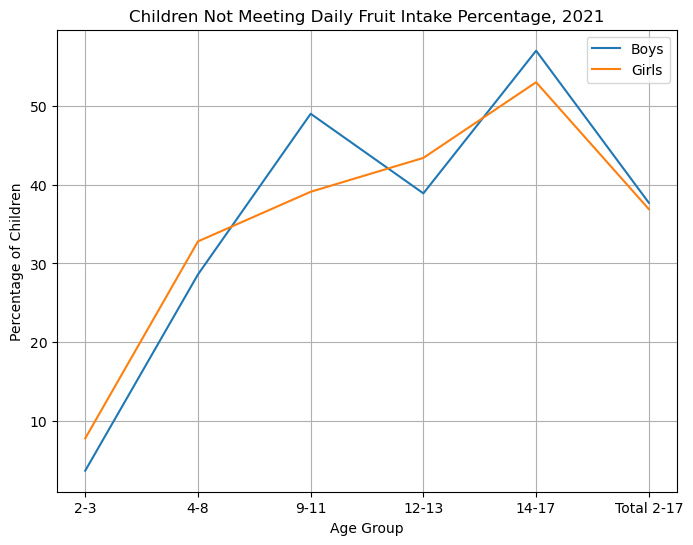

In [54]:
# Plotting fruit consumption
plt.figure(figsize=(8,6))
plt.plot(fruit_vegetable_dataset['Age group (years)'], fruit_vegetable_dataset['Boys_no_fruit_consumption'], label='Boys')
plt.plot(fruit_vegetable_dataset['Age group (years)'], fruit_vegetable_dataset['Girls_no_fruit_consumption'], label='Girls')
plt.title('Children Not Meeting Daily Fruit Intake Percentage, 2021')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Children')
plt.legend()
plt.grid(True)
plt.show()

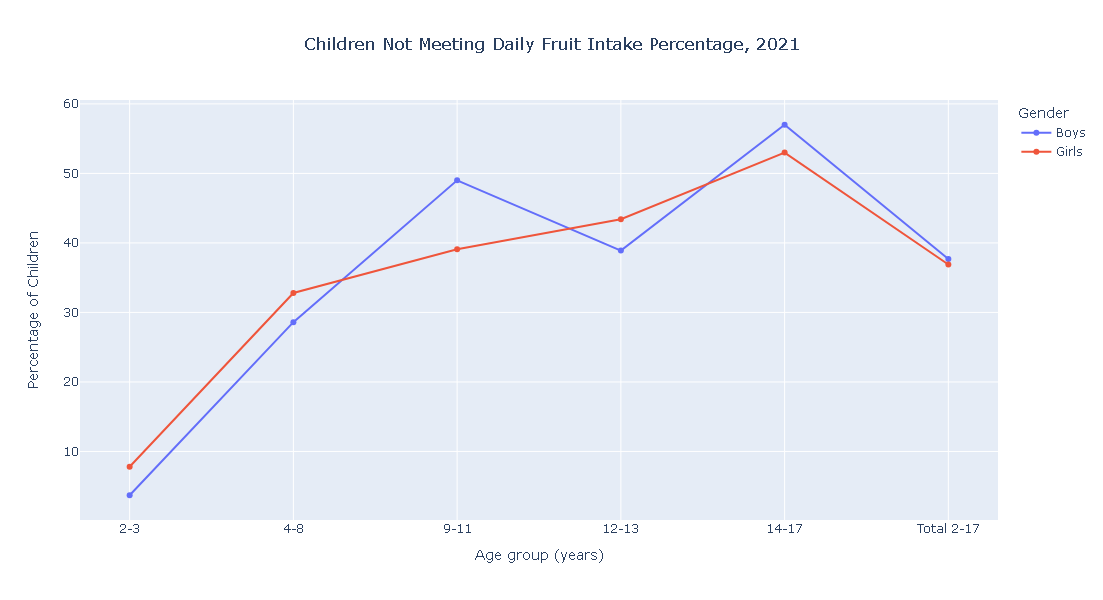

In [55]:
# Plotting the graph for 
fig = px.line(fruit_vegetable_dataset, x='Age group (years)', y=['Boys_no_fruit_consumption', 'Girls_no_fruit_consumption'], 
              title='Children Not Meeting Daily Fruit Intake Percentage, 2021',
              labels={'value': 'Percentage of Children', 'variable': 'Gender', 'Boys_no_fruit_consumption': 'Boys', 'Girls_no_fruit_consumption':'Girls'})
# using update_traces to achieve dynamic properties in the graph
fig.update_traces(mode='lines+markers', hovertemplate='<b>Age Group:</b> %{x}<br><b>Percentage:</b> %{y:.2f}')
fig.update_traces(name='Boys', selector=dict(name='Boys_no_fruit_consumption'))
fig.update_traces(name='Girls', selector=dict(name='Girls_no_fruit_consumption'))

# Adjusting the size of the graph
fig.update_layout(width=1000, height=600)

# Centering the title
fig.update_layout(title_x=0.5)

# Plot the graph
fig.show()

Graph for children who doesn't meet the daily vegetable consumption percentage

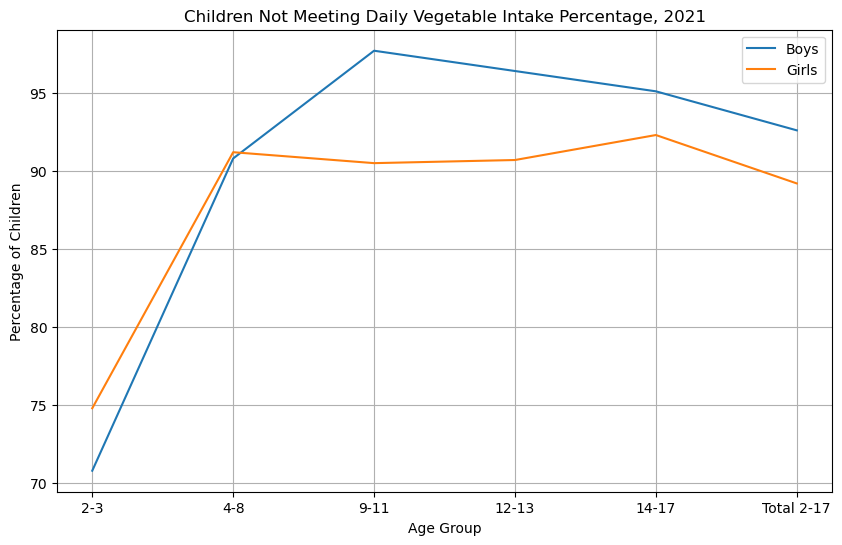

In [56]:
# Plotting Vegetable consumption
plt.figure(figsize=(10,6))
plt.plot(fruit_vegetable_dataset['Age group (years)'], fruit_vegetable_dataset['Boys_no_vegetable_consumption'], label='Boys')
plt.plot(fruit_vegetable_dataset['Age group (years)'], fruit_vegetable_dataset['Girls_no_vegetable_consumption'], label='Girls')
plt.title('Children Not Meeting Daily Vegetable Intake Percentage, 2021')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Children')
plt.legend()
plt.grid(True)
plt.show()

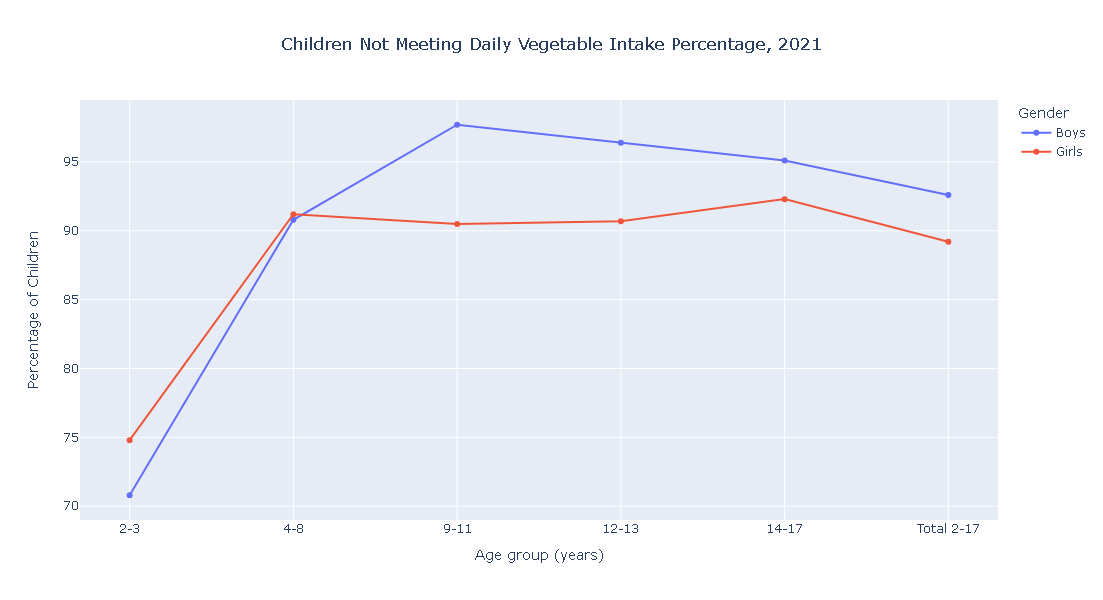

In [57]:
# Plotting the graph for 
fig = px.line(fruit_vegetable_dataset, x='Age group (years)', y=['Boys_no_vegetable_consumption', 'Girls_no_vegetable_consumption'], 
              title='Children Not Meeting Daily Vegetable Intake Percentage, 2021',
              labels={'value': 'Percentage of Children', 'variable': 'Gender', 'Boys_no_vegetable_consumption': 'Boys', 'Girls_no_vegetable_consumption':'Girls'})
# using update_traces to achieve dynamic properties in the graph
fig.update_traces(mode='lines+markers', hovertemplate='<b>Age Group:</b> %{x}<br><b>Percentage:</b> %{y:.2f}')
fig.update_traces(name='Boys', selector=dict(name='Boys_no_vegetable_consumption'))
fig.update_traces(name='Girls', selector=dict(name='Girls_no_vegetable_consumption'))

# Adjusting the size of the graph
fig.update_layout(width=1000, height=600)

# Centering the title
fig.update_layout(title_x=0.5)

# Plot the graph
fig.show()

Children who do not meet the daily Fruit and Vegetable Intake percentage based on the stats of 2021

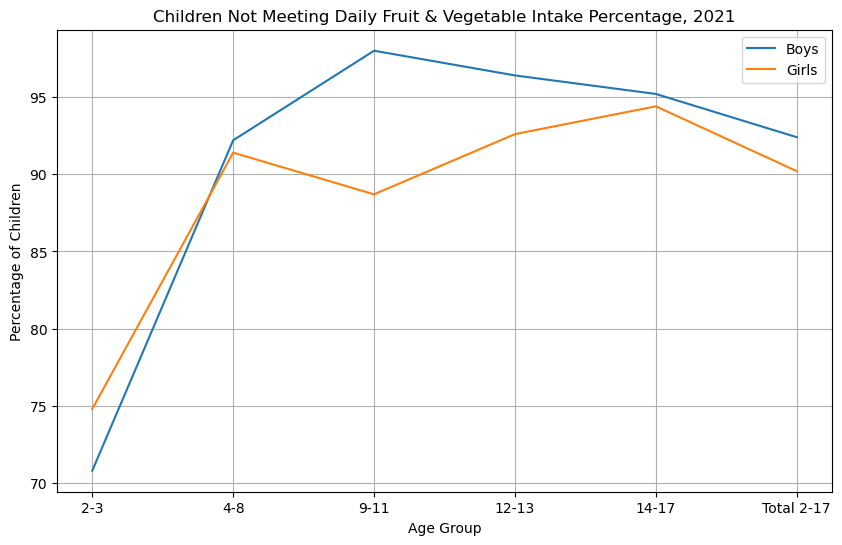

In [58]:
# Plotting Vegetable consumption
plt.figure(figsize=(10,6))
plt.plot(fruit_vegetable_dataset['Age group (years)'], fruit_vegetable_dataset['Boys_no_combined_consumption'], label='Boys')
plt.plot(fruit_vegetable_dataset['Age group (years)'], fruit_vegetable_dataset['Girls_no_combined_consumption'], label='Girls')
plt.title('Children Not Meeting Daily Fruit & Vegetable Intake Percentage, 2021')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Children')
plt.legend()
plt.grid(True)
plt.show()

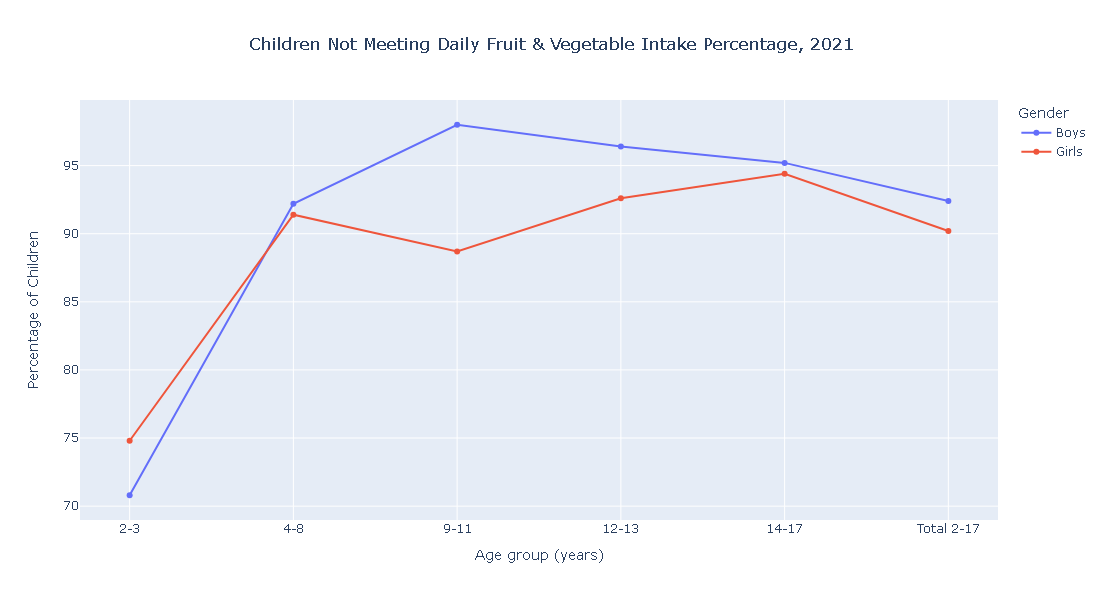

In [59]:
# Plotting the graph for 
fig = px.line(fruit_vegetable_dataset, x='Age group (years)', y=['Boys_no_combined_consumption', 'Girls_no_combined_consumption'], 
              title='Children Not Meeting Daily Fruit & Vegetable Intake Percentage, 2021',
              labels={'value': 'Percentage of Children', 'variable': 'Gender', 'Boys_no_combined_consumption': 'Boys', 'Girls_no_combined_consumption':'Girls'})
# using update_traces to achieve dynamic properties in the graph
fig.update_traces(mode='lines+markers', hovertemplate='<b>Age Group:</b> %{x}<br><b>Percentage:</b> %{y:.2f}')
fig.update_traces(name='Boys', selector=dict(name='Boys_no_combined_consumption'))
fig.update_traces(name='Girls', selector=dict(name='Girls_no_combined_consumption'))

# Adjusting the size of the graph
fig.update_layout(width=1000, height=600)

# Centering the title
fig.update_layout(title_x=0.5)

# Plot the graph
fig.show()